In [1]:
import numpy as np
import pandas as pd
import matplotlib

import gc
import time
import warnings

import json # JSON parsing
from lxml import etree # HTML parsing
import time # Time conversions
from lxml import etree # XML Parser

import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Text Dataset (CAPS + academic posts data)

CAPS Posts Text Data

In [2]:
capsText = """
||SEPARATOR||On Student Intervention Services (and CAPS) https://www.34st.com/article/2021/12/student-intervention-services-sis-caps-upenn-mental-health-wellness-reporting
||SEPARATOR||CAPS referral do you just call the number on the CAPS website to make an appointment? and then can they refer you to someone for further treatment? I looked at the website but I don't completely get all of it. thanks
||SEPARATOR||CAPS psych testing So CAPS suggested that get psych tested and I do actually exhibit some symptoms of the condition They did refer me to a CAPS clinician but would you guys recommend getting it done there or somewhere outside? Given the kinda horrid stuff people say about CAPS just wanted a good idea before doing this .
||SEPARATOR||When is CAPS open again? Title says everything. I had an assessment a few days before winter break and they told me to come back when they resume working.
||SEPARATOR||Is CAPS open during the break?
||SEPARATOR||I love being on the verge of crisis while caps is booked on appts until next month truly an unbeatable feeling
||SEPARATOR||Does anyone have a cap and gown I can rent for grad pics? Willing to pay. PM
||SEPARATOR||what will it take for the admin to treat mental health seriously anyone else feel like the only support we get is “go to caps and get referred out lol”
||SEPARATOR||Welcome New Quakers! Here’s some tips from my 4 years at Penn
||SEPARATOR||internal transfer??? hi guys
||SEPARATOR||How do y'all deal with procrastinaton Not joking. I mean it got so bad for me and badly affected my academics so much I decided to go to CAPS for the first time. Really wanna keep it under check so figured might as well post it here cause Penn Reddit has almost always been very kind and helpful. So would love to know how all you smart asses deal with procrastinaton. Love y'all :D
||SEPARATOR||Therapist Recommendations Hey guys!! Sophomore in the college. Been struggling a lot with drinking and pretending I'm fine with hook up culture. Can people send me recs for therapy or services besides CAPS that would be helpful? Thanks in advance!
||SEPARATOR||I'm burnt out I feel like I'm at my tipping point. I have no community to be a part of. I'm at the point where I'm barely keeping up with my classes, but I have no motivation outside of that. Every effort I make to better myself, i.e. join clubs, meet more people, etc. just backfires (I get rejected from said clubs, people find me boring, I can't get anything right) and I end up investing time for absolutely nothing. I try my hardest, but it's never enough. Even with the few good things I have in my life, the few people that care about me, I somehow manage to fuck it up. I push people away and can't show them how much I appreciate them. I'm at the point where sleep is the only thing I can rely on to provide comfort. I'm at the point where I'm just watching my life go to waste and I'm just stuck observing. I'm at the point where I've used up all my energy and nothing is there. The worst part is I know there are people out there that are going through worse, but somehow still stay strong, and here I am with my energy depleted. What the fuck am I doing wrong with life?
||SEPARATOR||how do i stay motivated i’m so depressed lol ✌️
||SEPARATOR||CAPS For those who have talked to CAPS before, does it help? Did you feel better after talking with them?
||SEPARATOR||A brief note about CAPS and mental health Hello
||SEPARATOR||Any experience with CAPS for eating disorders? (TW) First, TW for anyone who is struggling! Don’t feel the need to read more if this is upsetting to you please.
||SEPARATOR||Graduation regalia buy/exchange tl;dr I'm trying to help people buy and sell graduation caps/gowns/hoods! If you fill out this form I'll try to match you up.
||SEPARATOR||Regalia for cheaper I wanted to ask a couple of questions. What is the procedure to get a regalia for the graduation ceremony? How much does it cost?
||SEPARATOR||What would happen if caps knew I was suicidal?
||SEPARATOR||Questions about CAPS Is CAPS free for Penn Students? Also, is it possible to schedule weekly or biweekly meetings like an actual therapist, or is it more of a come once or twice when you need it type of thing?
||SEPARATOR||stat classes and wharton cap would taking an intro stat course like 111 count toward the cap of 4 wharton classes for cas students? i want to take it to fulfill the quant data analysis requirement
||SEPARATOR||Really need to see CAPs I’ve had so much anxiety with finals coming up and the derek chauvin trial literally makes my anxiety so bad. I’m not able to get an appointment with CAPs until next week I’m literally shaking
||SEPARATOR||how do i get a therapist from CAPS? title. thank you!
||SEPARATOR||Can CAPS give you an official diagnosis Specifically, I need an eating disorder diagnosis to get out of the meal plan. I definitely have an ED but I’ve just never seen anyone about it
||SEPARATOR||CAPS Is there a way to request specific traits for a caps therapist? Any recommendations for therapists in caps who help with anxiety?
||SEPARATOR||Finding non-Caps therapy I’ve seen quite a lot of posts that say that the extent of caps is not long term therapy, which I can almost definitely say is something that I could use. I’d love to find a therapist that isn’t at all related to penn, however I am a low income student that doesn’t want their parents to know I’m seeking therapy.
||SEPARATOR||stat classes and wharton cap would taking an intro stat course like 111 count toward the cap of 4 wharton classes for cas students? i want to take it to fulfill the quant data analysis requirement
||SEPARATOR||Admitted Student Question: Can I drop an AP Psych class? Hey Quakers,
||SEPARATOR||Anyone on the Penn Student Insurance Plan (PSIP) and seeing a therapist outside of CAPS? I went to CAPS for a while in the past, but I’m hoping to see someone for more long-term therapy now (mainly for anxiety).
||SEPARATOR||Depression Maybe I would’ve been this way wherever I went to college, and the grass isn’t always greener on the other side.
||SEPARATOR||How I handle my mental health at Penn Hi I am a junior in Wharton and wanted to talk about mental health. I know that it seems pretty hopeless at Penn because of how depressing it is and while it is really depressing, I want to talk about what I do to improve my mental health UPenn. Feel free to reach out especially prospective students. I’ve also had a lot of experience working with CAPS and SHS so feel free to ask questions about that. Just want to help.
||SEPARATOR||How to make a CAPS appointment? Sup guys, I wanna make a CAPS appointment, am mentally okay and just have a very specific issue I need help with. The CAPS website is so obtuse and confusing to navigate, how tf do I make an appointment? Is there an online form or must I call, would rather do that than walk in and idek whats going on w covid. Tyyyy
||SEPARATOR||‼️ Struggling a lot as a Freshman 😭‼️ I must say that Penn has been a huge struggle since I got here around 3 months ago. I’m not doing well at all in literally any of my classes (getting C-grades most of the time). I have been grinding all the time (many all-nighters) and studying as I did in high school but like everyone here is so smart wtf. I want to go to graduate school too so this isn’t a great start. I’m trying not to care too much about grades but I’m literally struggling in a class with a difficulty of 2.0 on penncoursereview so I have lost all hope.
||SEPARATOR||Therapist recs? going thru a lot rn and i already went to CAPS and maxed out my limit
||SEPARATOR||A Complicated Ally: Navigating Crises With Student Intervention Services
||SEPARATOR||Anyone looking to resell their graduation cap and/or gown? I'm a woman in engineering CO '22, 5'11", looking to make a sustainable choice (and maybe save a couple bucks). DM me if you want to give a second life to your graduation gear!
||SEPARATOR||Freshman Stress Hi, Penn Reddit.
||SEPARATOR||CAPS won't meet with incoming freshmen until the semester starts I called 'em up since I wanted to talk with a therapist about jitters from college starting, and they said they won't give me an appt until classes start. Bogus.
||SEPARATOR||any other freshmen struggling? recently I’ve just kinda been struggling and honestly it hurts seeing so many other people thrive in their classes and already have a close social group. I have a good amount of friends here and there, but I don’t feel that close to them / I’m not really anyone’s go-to person to be around. I’m doing okay in some of my classes, and the others I’m holding on to hope, not thriving in any. I don’t at all fit in with the outgoingness of this school, and I don’t thrive with the party scene. I’m completely unsure what major / career path I want to pursue. Honestly I’ve become kinda numb to it all and part of me thinks I should’ve never come here. The other part of me thinks I’m the issue.
||SEPARATOR||Feedback on CAPS/other therapy for anger management? Throwaway because I don't want to be known as Penn's Andy Bernard. I made my first appointment with CAPS today, but I've seen/heard that they're kind of useless. I was wondering if anyone has feedback on CAPS or recommendations for counselors/clinics that are good at anger management
||SEPARATOR||places to be completely alone and can’t be heard by anyone ? share a bedroom and looking for a place to do caps therapy where no one can hear me. thanks
||SEPARATOR||Taking leave during the semester cuz of mental health? TW: mental illness
||SEPARATOR||For students who were in therapy before coming to Penn, how did you transition? By this I mean, did you continue seeing your therapist via telehealth, did you switch to a new therapist, or did you just utilize CAPS? I'd love to hear how your experience was regardless of which you chose.
||SEPARATOR||reach a peer line unavailable Just wanted to shout into the void, so I busted out my old throwaway account. I've had a really bad day, had a fight with my s/o and finals are stressful. Idk if the people who run the reach-a-peer helpline read this subreddit, but I tried to call and no one answered. Kinda feels symbolic of the mental health awareness effort here at this school.
||SEPARATOR||CAPS How are the CAPS services here? Are they actually helpful or do they just refer you elsewhere if it seems like you need more than a pat on the head?
||SEPARATOR||If you are struggling, you are not alone. Please ask for help if you need it. A student at Yale died by suicide earlier this week. Normally, around moments like this, we fear "contagion," or the idea that heavily reported suicides can cause a spread effect.
||SEPARATOR||Official Admitted Student FAQ and "Can I talk to someone who..." Thread [Class of 2025 RD Edition] In less than 24 hours, the Class of 2025 will receive their RD Decisions for Penn (Tuesday, April 6th, 7PM Eastern). This thread will be used as a centralized Q&A Thread. Posts with specific questions about Penn will still be allowed. Other posts, including but not limited to Internal Transfer and Penn vs. XXXX posts, will be deleted and the OPs will be sent here.
||SEPARATOR||Question about CAPS If I book an appointment at CAPS, am I allowed to choose which therapist I get for that appointment?
||SEPARATOR||CAPS situation, in light of all this? As luck would have it, during the week leading up to break, I decided that as soon as I returned, I would make a CAPS appointment (my first one). Now that our classes have been canceled and human contact is discouraged, does anyone know what’s going on with CAPS? I know I could call the hotline, but am wondering if there are any other options.
||SEPARATOR||CAPS and ADHD Is CAPS a good place to go if I need to get a prescription for ritalin? I had one at home but my family no longer sees that doctor (personal reasons) and I ran out of my last refill. I have not been as motivated recently and need to see about this. Does anyone have experience with this? Should I go to an external psychiatrist?
||SEPARATOR||Getting medication from CAPS What was it like? Would appreciate it if anyone could share their experience. My counselor at CAPS set up an appointment for me with one of the psychiatrists there, and I’m a bit nervous.
||SEPARATOR||Insomnia Treatment CAPS Does anyone know if CAPS treats insomnia or has experience with this?
||SEPARATOR||Short Penn puns? I’m graduating in a few weeks and am decorating my cap. I want to add a short, funny pun to my cap! Any ideas?
||SEPARATOR||Club Room Does anyone know how I can reserve a small room (10-15 cap) for a club meeting? And is there a way I can reserve that room for a certain time every week?
||SEPARATOR||CAPS Wish I had the courage to go to CAPS again. I don't wanna feel this way any more. Edit- Thanks for all those kind words. These words literally made me stop and think about what I was planning on doing that day.
||SEPARATOR||Therapy Idk if this is weird for me to post here. I just need to talk to somebody. I’ve heard of things like CAPS and stuff but idk what any of it is or how it works. I’ve realized that what I urgently need is somebody I can just pour everything out to that can help me heal. I don’t know if this is a realistic expectation or not. If anyone can point me anywhere I would appreciate it, I just don’t know where to start. I’m not sure what exactly our school offers or if this would be the right place to find what I’m looking for I just need help. Thank you
||SEPARATOR||Your thoughts about CAPS Hi everyone,
||SEPARATOR||Updating the r/upenn "Can I speak to someone who..." List Hey all.
||SEPARATOR||Official Class of 2025 ED Q&A Thread [Current Students: Come connect and answer questions!] Welcome new Quakers, and congratulations! Please use this thread to ask any and all questions, and hopefully current students and alumni will stop by to answer them!
||SEPARATOR||CAPS and Emotional Support Animal Hi everyone! I am considering getting an emotional support animal and am wondering if anyone happens to know if CAPS can write me a prescription letter. Thanks!
||SEPARATOR||Any positive stories? Hi r/UPenn, I know everyone is having a rough week (ok maybe a rough month....actually a rough year) but I was wondering if anyone wanted to share any small victories/ positive stories relating to school?
||SEPARATOR||does anyone know the max number of classes PennCAP covers during the summer? also, is the PennCAP grant only for Penn summer classes or can it be used at another 4 year university? thank you!
||SEPARATOR||Have questions about course selection for Fall 2020? Ask them here! Hey, new and returning Quakers! Feel free to ask any questions you may have about course selection for Fall 2020 in this thread - including, but not limited to, "Which professor should I take this with?" and "Is this pre-requisite really requisite?".
||SEPARATOR||how can i be a student at penn and feel so useless content warning for suicidal thoughts and depression.
||SEPARATOR||Interested in a seminar that talks about better dealing with adverse health/mental effects due to WFH ? View Poll
||SEPARATOR||Is CAPS open over the summer? Wondering if CAPS is open to undergrads for individual consultation/counseling during the summer term even if you're not enrolled in courses during that time.
||SEPARATOR||Another Meandering Vent Post about Nothing in Particular I know that there are about eight million posts like these (I saw one like it today), but I just need some way to express myself. I'll probably delete it later once I grow too embarrassed, but for now, this will do. TLDR at the bottom.
||SEPARATOR||Wait times for CAPS triage assessment, initial assessment and beyond I've been hearing conflicting accounts of the services being provided by CAPS and the information given on their website. The general complaint seems to be that the staff at CAPS is amazing but there aren't enough people and the response time is too high, but I was wondering what people's actual personal experiences are. If we can quantify the time-frames, it would be easier to address these issues. I would also like to know if anyone called CAPS after-hours and was successfully able to reach the clinician on-call and get help. Relevant stuff I found in the FAQ:
||SEPARATOR||What is the process for CAPS individual therapy? I feel like I could benefit from seeing a psychologist after some stuff that's been going on in my life, but the website confuses me, and I was hoping someone here could clarify - once you complete the online assessment (which I have yet to do, but will do next week), and they call you, do you get individual therapy if you want it, or is there a chance you could get denied for that?
||SEPARATOR||Has anyone had experience with the UPenn counseling center? Starting as a graduate student at Penn this week, was wondering if anyone has had experience with the counseling center, had a bad experience with my undergrad one but really need to get some help.
||SEPARATOR||Cheapest place to get a Penn/Wharton cap/hat?
||SEPARATOR||How to do well at Penn (mostly for students already at Penn for a year, not newly admitted students, contains some econ/finance jargon) Realize that everything is about efficiency. Put in a minimal amount of effort to get maximum results. Produce until marginal utility equals marginal cost. That means for grades, make sure that you put in just the right amount of work to get a pass or an A.
||SEPARATOR||Class of ‘21- did anyone else get a random box of grad stuff in the mail? A graduation cap with no tassel; a very small, lame Penn pennant; a cheap, plastic “Class of 2021” license plate cover.
||SEPARATOR||A Fall 2020 Info Masterpost NEW FAQ: https://fall-2020-planning.upenn.edu/content/faq-08112020
||SEPARATOR||Words of Advice to the Class of '23 from a Current Freshman Congratulations! You did it! If you're eager to learn more about Penn, here are some words of advice for the Penn Class of '23 from a current Penn freshman.
||SEPARATOR||Sharing course materials for Wharton 0.5 CU Pandemic course? I'm maxed out on my CUs and my advisor won't let me raise my credit cap, so I can't register for the new 0.5 CU Wharton pandemic course.
||SEPARATOR||Therapy coverage in insurance I've heard CAPS refers people to therapy if they have long-term needs. Does PSIP cover this referred therapy?
||SEPARATOR||Fuck this school Goddamn this place is awful
||SEPARATOR||Why might I not like UPenn? So I’m considering applying to Penn early decision but hailing from California I’ve never visited the school or even the state of Pennsylvania. I have no idea what to expect so I’m wondering what I should be aware of/might not like if I get in. For those of you who don’t know how early decision works, basically if you get accepted you’re required to attend the school, so I’m a bit nervous about applying. (I can’t visit due to the obvious financial constraint of having to fly across the country.) If it matters, I’d probably be applying for Wharton/Econ. Thanks.
||SEPARATOR||Depression: I want to hear your stories I miss my family severely and want to go back home. I have no money, no friends, no passion to get me through the remaining college years. I tried counseling at CAPS, but they didn't help my situation very much. I thought about taking a leave of absence or dropping out, but I need a college degree to start supporting my family financially as soon as possible. Every night, I go to bed wishing that I would magically never wake up (I'm not actively suicidal, so don't worry about my safety.) I just wanted to know if anyone went through a situation and wanted to hear some of those stories if people don't mind sharing.
||SEPARATOR||Experiences with PennCAP PFP? Hey,
||SEPARATOR||PennCap Move In Hello, do you move into your assigned dorm on the forst day of PennCap? Or is there a designated area that all PennCap persons reside in during the program? Thank you in advance.
||SEPARATOR||Pre-Freshman Program Anyone here has participated in PennCap's Pre-Freshman Program in the past? If so, could you please share your experience and whether it's worth it?
||SEPARATOR||Anxiety in the houses Incoming freshman here and rather worried about this the more I think about my housing options.
||SEPARATOR||PennCAP anyone on here who went to PennCAP? I got invited to apply and have some questions about student experiences!
||SEPARATOR||Concentrations and Majors Hello there UPenn Community,
||SEPARATOR||Help! Trying to find someone to take my lease at UCross. Hello! I am currently looking for someone to take my lease at University Crossings. It's very last minute, but please help a girl out. They are newly renovated and will be open for the fall! Drexel Affiliated Housing, but not closed to just Drexel students! Walk in tours are welcomed! This apartment is a 2 bedroom 2 bathroom shared occupancy at $799 per person. I know it's really pricey, and that's why I am not able to live there anymore. It comes fully furnished. Utilities included (Water, Sewer & Trash, Cable & Internet, and Electricity up to a $25 per person monthly cap. Unit Features: Long hallway entrance. Hardwood-style living room floors. Living room furniture with a leather-style sectional sofa. Dining furniture such as stools for the counter. 2 inch wood-style blinds. Bedroom carpet. Bathroom fixtures and upgraded bathroom storage. Light fixtures. Paint and crown molding. City views. Central heating and air. Storage closet. Private and shared accommodations available. Walk-in closet. Full-sized beds. Dresser. Nightstand. Study desk and chair. Full-sized kitchen with appliances. Sprinkler system in each unit. Individually locking bedroom doors. University Crossings is considered an off campus community, but it is just across the street from Drexel University and The University of Pennsylvania. It's in the heart of University City. The food culture is incredible. From food trucks, to late night dining. Great night life. It is also within walking distance of 30th Street Station, several septa stops, and only minutes away from Center City. I am transferring schools so I will no longer be living on the east coast. University Crossings is located on 3175 John F Kennedy Blvd, Philadelphia, PA 19104 You can find more info on http://ucrossings.com Other features: Media and Game lounge. 24 hour Gym. Computer center. Study rooms. Fully loaded game room that features 2 pool tables, ping pong table, Golden Tee, and Big Buck Hunter Fees: $50.00 Application Fee $0.00 Security Deposit Rent: $799 a month per person. First installment is due September 1st, 2015 Payment is acceptable via check or money order Online payments can be done on connect.studenthousing.com (more information about setting up your account will be available and sent to you in July) Please email me at elizaoctavo@yahoo.com if you're interested!
"""

Academic Posts Text Data

In [3]:
academicText = """
||SEPARATOR||path at penn so last night I had people telling me to click the register button for my courses, so I did, was I not supposed to do that/am I screwed?
||SEPARATOR||Pathatpenn registration Are people able to successfully click "Submit Registration" and see what courses they got in Path@Penn?
||SEPARATOR||CIMS 101 How is CIMS 101 with Coppola in terms of difficulty?
||SEPARATOR||Ya'll have the co-req issue on Path@Penn? like you've already taken the co-req course (or currently enrolled), but it doesn't know that, so it prevents you from registering.
||SEPARATOR||financial aid for summer courses I’m not highly aided or low income but penn pays for like 85% of my total cost of attendance. I can’t pay 5k for a summer course …. does anyone know if I can somehow get grant aid from penn to take one? I know the website makes it seem like it’s very unlikely but wondering if anyone has been able to somehow do so
||SEPARATOR||summer courses for pre med Interested in hearing people’s thoughts about taking chem 102 or physics 101 over the summer as a pre-med student. I’m not amazing at either subject but I wanted to free up my schedule so the fall semester is less stressful/more flexible to take classes I actually like and I can devote more time to these more challenging classes in the summer. but I’m a bit worried about how fast the course goes and if it would be manageable if I’m doing a research job over the summer.
||SEPARATOR||Advisor Hold I am in SEAS and my advisor approved my courses on Thursday. I noticed afterward that Path at Penn still said that I was on advisor hold, so I emailed my advisor back. He said that on his end, there was no hold on my account and that I should be fine. However, on Path at Penn, it still says that I am on Advisor Hold and cannot register for courses. What should I do?
||SEPARATOR||path at penn Does anyone know if we can sign up for more courses than allowed for the advanced registration?
||SEPARATOR||Can anyone else not sign up for nelc 0650??
||SEPARATOR||Democracy and Disagreement (Ian Macmullen) What did people think of this course? Would you recommend it? The professor seems to be new so I don't have much to go on.
||SEPARATOR||BIBBMajor/Premed Course Advice Should I take Animal Bx BIBB2140/231 or Drugs Brain Mind 2270/270 with Biochem and Orgo 2
||SEPARATOR||Cis1100 vs Engr1050 Which should I take? Any opinions on either courses? I have a pretty difficult schedule in the fall and I was hoping one would be better than the other
||SEPARATOR||Can I still transfer to seas at the end of sophomore year? Current sophomore in CAS. The website says applications must be made prior to the end of sophomore year, so does that mean I am still eligible to apply? Only recently realized I wanna do cis and couldn’t finish all pre reqs until this semester. Thanks!
||SEPARATOR||Exchange @ King' College London from SEAS Hi!
||SEPARATOR||Math 240 Grading Does anyone know how the final grade for this class works? It doesn’t say anything on canvas and if the class is uncurved the means gonna be like a C considering the quiz averages have been 8-12/16 and that’s with a lot of students cheating.
||SEPARATOR||BIOL121 and Orgo 1 Is taking BIOL121 and Organic Chemistry 1 in the same semester worth it? Basically, I’m considering it because I want to take genetics (which was previously BIOL221) while still fulfilling pre med requirements (don’t have room to take 3 bios if I do 101 and 102 because of my major). If you have taken both classes (doesn’t have to be concurrent) can you give me advice as to why you would be for or against taking them together?
||SEPARATOR||Has anyone done the Barcelona study abroad at Pompeu Fabra University? I'm considering doing this study abroad program next year and am looking to speak with someone who did it! Does anyone have any thoughts on the program?
||SEPARATOR||How to put alternatives at Path@Penn The how-to video isn't working for me.
||SEPARATOR||religious holidays and finals so obviously I recognize it’s way too late now to ask for a rescheduled final, but I’m curious so I know for the future: tomorrow is Eid, a Muslim holiday that lasts up to three days, and I have a chem 101 final on Tuesday. Would I have been able to reschedule the exam for later in the final exam period if I asked earlier or would it be expected by my prof that I prioritize the final?
||SEPARATOR||Econ 002. I am planning on taking this class over the summer. The instructor is Justin Lam. Has anyone taken the class with him before. Should I take the class with him. I can't find anything on the Course review.
||SEPARATOR||Putting CIS320 off until senior spring? Is this advisable? How important is this class for my knowledge in the field? If it's less important I'm more inclined to put it at the end since I'm not a fan of rigorous theory/math classes
||SEPARATOR||Is it possible to fail OIDD 101? From a stressed Freshman who thinks she might fail :(((
||SEPARATOR||Basu or Roman for Physics 101?
||SEPARATOR||Clicking Submit Schedule Why am I not able to click "Submit schedule" on PathatPenn even though I checkboxed all the courses I wanted to take.
||SEPARATOR||Urgent Questions about Advanced Registration How does registration priority work? Can I rank everything as first priority? Should I rank credit-bearing courses first or non-credit-bearing courses first?
||SEPARATOR||can't find writing seminar on Path@Penn? In addition to a bunch of problems with the new system I can't seem to find or register for any courses that fulfill the writing requirement. Anyone else having this issue or know how to get around it?
||SEPARATOR||anyone taken a class with daud ali? Thinking about taking sast0001 (introduction to modern india) w daud ali and was wondering if anyone had any insight. appreciate it
||SEPARATOR||CIS 320 and CIS 240 Summer anyone ever take either of these during summer? Is it mangeable with a 9-5 internship?
||SEPARATOR||How to submit schedule? 
||SEPARATOR||Wharton 201 Is Wharton 201 a lot of group work?
||SEPARATOR||Advance registration When does advance registration finish? Midnight on april 31 or midnight tomorrow may 1? Thanks!
||SEPARATOR||how's philosophy of science? would people recommend it
||SEPARATOR||Are there friday quizzes in Math 241? Spent the last two semesters in math 114 and 240 and am not tryna ruin my Fridays like that again. I also noticed in course registration that you don't need to book a Friday lab/quiz section.
||SEPARATOR||Summer NRSC classes Im a post-bacc student planning on registering for either Autonomic physiology or Smell and Taste for the summer. Has anyone taken these during the summer if so which one would you recommend?
||SEPARATOR||How hard to get an A in ACCT101? Most of my schedule is engineering classes and I have one class spot left that I want to use as a GPA booster. Im taking FNCE 100 next sem too. How much of the ACCT 101 class gets an A??
||SEPARATOR||best lgst 101 prof? (laufer or feinstein)
||SEPARATOR||Professor George Park @ MEAM Anyone taken a class with him? Or know how he teaches? Is he chill? Thinking of taking fluids with him…
||SEPARATOR||Choosing alternate classes I am currently trying to pre-register for classes on PathatPenn. While I can choose classes in my primary cart, I am having trouble selecting alternatives. Under each class, there is an option to put a primary and secondary alternative but I do not know how to input classes into those categories. How do I do that?
||SEPARATOR||Summer hybrid course question So I'm trying to take 121 and/or 262 over the summer but they are both listed as 'hybrid' (see image)
||SEPARATOR||When I am ranking, am I still doing the ranking by the class that bares credit? This is specifically because some political science classes have the credit in the recitation and not the lecture. While others have the credit on the lecture and not the recitation...
||SEPARATOR||CIS 2400 Recitation Does CIS 240 not have a recitation in the fall? Asking bc Path only has one lecture section with no recitations unlike other CIS courses.
||SEPARATOR||CHEM 2410 VS 2411 orgo chem dun dun dunnn … so i have chem 2410 (orgo without the lab) on the list of my major requirements. but i’m a bit confused between chem 2410 and 2411 and don’t understand how they work differently. since 2410 is on the list, i’m going to take it but is it a bad thing to not take the lab? am i missing out a lot? or should i just take the lab as well? please share your wisdom orgo chem students 🥺
||SEPARATOR||DSGN 264: Art, Design, and Digital Culture with Chris Lawrence How is the workload/difficulty in this class with Chris Lawrence? What are some things that this class involves?
||SEPARATOR||Phi Beta Kappa Membership fee Any alumni or current seniors know if it's worth it to pay the $130 fee? Can you still go to the induction without paying it? Seems like an awfully lot of money for something that will not have any value in the slightest
||SEPARATOR||Math 340? Has anyone taken math 340 with Scedrov? Syllabus looks easy but wanted to hear previous students’ experience.
||SEPARATOR||Do we need to do alternate classes on Path at Penn for advance registration? New system, not sure if we should still do alternate class/ranking? The new UI doesn't seem to make it as prominent.
||SEPARATOR||textbook used for math 502-503 / math 508-509? title
||SEPARATOR||Do you have to take FNCE100 and ACCT101 together? Do you recommend taking those two together or does it not matter that much
||SEPARATOR||To the people that declined their invitation to BFS, did you regret it?
||SEPARATOR||Any Advice? - Duke Vs. Brown Vs. UPenn Hello! I know responses will be biased since I'm posting here, but I'd love some last-minute college decision advice!
||SEPARATOR||FNCE 100 How is FNCE 100 with Bustamante/Indarte?
||SEPARATOR||BIBB109 Hi! So I’m currently in BIBB109 with Mclean and our cumulative final is on Tuesday and I’m really worried because I didn’t do so hot on the first 2 exams (we do get to drop 1). I just wanted to ask if any previous students had any advice for the final.
||SEPARATOR||Fully paid trip to Estonia to teach ambitious kids about modern tech (opportunity) Hey everyone - my friends at https://tks.world/ are planning a 3-week mini university for https://www.mindvalley.com/u’s youth program - they'll be helping to put together an accelerator program for ambitious youth to learn about the most innovative tech, building communities, and driving impact in the world.
||SEPARATOR||Tech Elective Recommendation Are there any super easy tech electives out there for engineering?
||SEPARATOR||Do I need a Wharton Penn key to sign into their computers?
||SEPARATOR||CIS 320 in the fall or spring? Have heard that CIS 320's professor is marginally better in the spring, but I was planning on taking this fall to get it over with/for recruiting earlier. Is it worth waiting a semester to take it with Sanjeev?
||SEPARATOR||Best Professor PHYS 101, Basu or Roman?
||SEPARATOR||ECON 2100 (ECON 101) with Vohra Is it actually that hard, or is it just ranked highly in difficulty because it is taken by primarily CAS students?
||SEPARATOR||Advanced Registration Hold? Are students still placed on holds before talking with an advisor during Advanced Registration? I tried asking my major advisors, but still haven't gotten a clear answer to this. I'm confused by the new Path at Penn system, and so I went to hit Submit Schedule and it sent me to the Submit Registration page (which I cannot click). Does this mean that I'm still on hold for Advanced Registration and can't submit courses?
||SEPARATOR||summer eas 203 lectures are online, but do you still have to attend or can you watch recordings?
||SEPARATOR||How to "reject" research opportunities So in an effort to search for research opportunities, I sent out a few emails to professors whose research interested me (I think that's what many people do, right?). But now I have an issue where more than one prof replied saying they could allow me to join (which i'm v grateful for) but how do I tell some of them that I no longer want to join since I received a more appealing offer?
||SEPARATOR||CIS 550 and CIS 380 Does anyone know how doable these two would be together? I’m just worried because I know 550 has a final project+final and 380 has a (I think huge?) final project as well. Any thoughts?
||SEPARATOR||oidd 291 negotiations w/ Krol? How is Rachel Krol for negotiations grading-wise and effort-wise? I'm looking for a chill 5th class, and her wed. section is the only one that fits my schedule besides the T/Th staff sections
||SEPARATOR||ECON prereqs Does anyone know if the Econ department enforces prereqs during advanced registration / how willing they are to let people into classes missing prereqs? For example this semester I was able to sign up for another departments class and take it even though I don't have all the prereqs. I'm trying to take a course next semester in ECON, but I dont have ECON 101 and its a prereq so I'm curious.
||SEPARATOR||Summer study abroad programs 1) Any recommendations for summer study abroad programs Penn will accept credits from?
||SEPARATOR||LPS online Hi, I’m an older college student (32F.) I decided to make a career switch & go back to school. I ran across the LPS BAAS and was wondering if it is similar to the Harvard extension program? Or does it come with UPenn’s name attached? I am extremely interested in applying, but I would be leaving a school where my costs are covered in order to do so. I would want to ensure the extra cost was worth it in the long run. Can anyone speak to how it is viewed in the real world and by other Penn students/Alumni?
||SEPARATOR||PSYC 005: Grit Lab Question: For Grit Lab, do I normally just sign up for the class through advanced registration or is there an application and I need to email the professor?
||SEPARATOR||advice for TA question So one of the classes I am taking of is graded based on three things. quizzes, 5 written assignments, and participation. While I think I know how I am doing in regards to quizzes and the written assignments, I have no clue how I did for participation bc my TA never really gave feedback and I have no clue how he determines the grades for it etc. Given that it is 25% of my grade, is there anything I can do to check in with my TA to see how I did for participation, and ask if there is anything I can do to improve my participation score? Idk I just have no clue where I stand with participation and I am worried it is going to tank my grade and I am wondering if there is anything I can do
||SEPARATOR||Has anyone taken beginner level or intermediate level Hindi who was relatively fluent in it and is willing to answer some questions about it? Please PM me because I have some questions!
||SEPARATOR||Probability Theory Courses I'm planning to taking an upper-level, rigorous proof-based course on Probability Theory sometime next year, and was thinking between the courses listed above (MATH546, MATH648/STAT930, ESE530), but there's not much info available about these courses online. Can anyone who has taken one or more of these classes tell about the difference between these classes, and/or how difficult they are?
||SEPARATOR||CIS 380 registration Is CIS 380 hard to get into during advanced registration? Debating where to rank it
||SEPARATOR||How much effort is COGS 001? I'm trying to find a really easy CIS elective for next sem and they don't seem to offer much. I wanna have options apart from the 19x courses. What is the work load like and are there exams/finals/midterms and coding assignments that I need to do for this class?
||SEPARATOR||Summer Classes Is taking two 6 week summer classes (math 240 and cis 120) simultaneously a terrible idea or is it relatively manageable?
||SEPARATOR||Which lgst class is the easiest (lgst 100 with struddler, lgst 100 with spielwal, or lgst 101 with laufer)? Debating between these 3 lgst classes:
||SEPARATOR||So I kind of messed up… I applied to Penn as a PPE major because I thought its interdisciplinary nature was perfect for health policy (social studies/polisci + health policy in policy track).
||SEPARATOR||CIS 320 Does anyone know what the CIS 320 distribution (with Sanjeev or otherwise) is like? Currently a little under the mean on exams yet above/at on hws and wondering where I might stand heading into the final.
||SEPARATOR||COMM Data and Network Science Concentration Non-Comm course reqs What are the easiest Non-Comm courses that fulfill the requirements for the Comm Data and Network Science concentration? Or just any courses that fit this description that you'd recommend?
||SEPARATOR||CIS121 Summer Course Has anyone taken CIS121 over the summer and can attest to the quality of the teaching? Is it better to take it during the normal school year? Also, is there any difference between taking it in-person vs. online?
||SEPARATOR||HIST: Roquinaldo Ferreira or Melissa Teixeira I'm considering taking a HIST course with either Roquinaldo Ferreira or Melissa Teixeira. Would really appreciate talking to someone whose taken either of them before!
||SEPARATOR||CIS Summer 2022? Got a grant for a 1 CU course and wanted to use it on an engineering course to give myself a leg up for my interests in a dats minor/submat, don't know if a better use of my time would be to take 110 or 120.
||SEPARATOR||Has anyone had Mcgaha CIS 240? Couldn’t find a lot abt them apart from Penn course review Kinda worried bc I heard that CJ was the way to go for 240. Any advice/insight abt Mcgaha?
||SEPARATOR||someone pls teach me how to ask for an extension I always feel so bad and I never end up asking for one even if I'm killing myself for the assignment. I'd appreciate any tips because I didn't know it was a thing, most of my teachers were never understanding so I'm just used to hard deadlines. 😭🥲
||SEPARATOR||Math 114 quiz average How would 22.4/30 translate to final grade? Assuming doing average on the final exam
||SEPARATOR||Changing major I’m currently enrolled in Cognitive Science, but I think biology or neuro might be a better fit for me. I’m not even in school yet, I’m part of the class of 2026. However, I’m not sure if I need to start making any changes now seeing that some degrees have some prerequisites before you declare them in sophomore year. What classes should I be taking (as in more bio classes or cognitive science classes)? Let’s assume that I’ll be pursuing a major in Neuro or Bio. Thanks.
||SEPARATOR||How useful will being able to transfer my AP Statistics Exam credit be? (Incoming Fall '22 Freshman) Intended Major: Electrical Engineering (with minor or second degree in Computer Science, maybe)
||SEPARATOR||MGMT 101 or MKTG 101? Which is easier? Rest of the course load would be: ACCT 101, FNCE 100, WH 201, STAT 405 (Half credit R class), and a class for my minor, so 5CU total.
||SEPARATOR||MLS vs Neuroscience BBB Hey everyone, I'm an incoming Freshman interested in pursuing med school after undergrad. I initially applied to LSM but got deferred to my second choice (neuroscience CAS). That being said, I'm still passionate about the intersection between business and science and would love to pursue it during my time at PENN.
||SEPARATOR||Award opportunity for Penn Undergrads - $1000 of Digital Media equipment. The Penn Libraries welcome current Penn freshmen, sophomores, and juniors to apply for this year's Seltzer Family Digital Media Awards. Each award will provide up to $1,000 for the purchase of hardware or technology of their choice for a research project the student is working on for one academic year, after which time the items will return to the Vitale Digital Media Lab in Weigle Information Commons for general use by the Penn community.
||SEPARATOR||How is STAT433? Thinking about taking STAT433 next semester.
||SEPARATOR||How easy is it to try out new things at Penn? I'm currently deciding between Duke and Penn. I'm completely undecided at the moment but I think I'm going to be pursuing a double major (comp sci + something else) with bio and economics.
||SEPARATOR||Take CIS 160 over the summer or fall? I'm a rising sophomore in the college, potential econ + cis double major, thinking of taking CIS 160 over the summer (along with math 114). I was wondering if I should take 160 over the summer to get it over with (it'll be online with professor Tannen) and then CIS 121 & Econ 101 in the fall,, or hold off to take 160 in the fall (with rajiv) bc I'll have at least one other friend to take the class with me then. Would appreciate any advice!!
||SEPARATOR||Getting a CIS Degree At The College Hey there,
||SEPARATOR||MES program at LPS, thoughts?
||SEPARATOR||Anyone Taken Design 001? What are your thoughts on the course? I'm a cis major looking for an easy elective to take over the summer.
||SEPARATOR||Jerome Fisher Program Transfer Applicants Hello everyone! I'm a high school senior accepted to UPenn and considering going for engineering.
||SEPARATOR||Which chem241 prof is better? I've heard that depending on the prof you could have weekly quizzes or midterms, and the class difficulty also varies. Any thoughts?
||SEPARATOR||Introduction to Micro Economics online summer course I’m looking into taking an online Econ course over the summer and was wondering if anyone has any experience with the credit away process and if they can recommend me any schools. Thanks!
||SEPARATOR||Anyone take BIOL 1604 (prev BIOL 140) with Janzen? It has p low difficulty and work required for a natural science course (lmk if you know any other easy seas natural science courses). wondering what the hws are like and is it easy A? tysm!
||SEPARATOR||Does anyone have any easy stem classes they recommend taking? Trying to boost my bcpm gpa! Thx!
||SEPARATOR||How easy is it to break into a top finance firm as a Wharton undergrad student? Is it true that Wharton undergrad students are "basically guaranteed a job on Wall Street?" I heard that it's very doable for Wharton people to get into finance and consulting like Goldman Sachs, JP Morgan, and McKinsey.
||SEPARATOR||How much harder is chem241 lab than 102 lab? Is it going to get any easier now that it is not a separate 0.5 CU (lecture is 1.5 CU instead like phys)
||SEPARATOR||Advanced Registration One of my courses says "linked course required (recitation)" but I have already added it to my cart. Might anyone know why this is happening? Thanks!
||SEPARATOR||CIS 519, CIS 520, STAT 571, ENM 531 or ESE 545 Which is the easiest course to fill this DATS requirement: CIS 519, CIS 520, STAT 571, ENM 531 or ESE 545 ?
||SEPARATOR||How many CIS courses? I have no CS experience, but I want to be able to create apps/programs. What CIS course sequence would let me do this?
||SEPARATOR||MGMT230(0) (Entrepreneurship) as Non-Wharton Student Generally interested in taking this course pass/fail as a fun/interesting elective. Would this be manageable with no experience in the Wharton core curriculum or is that generally expected going into the class?
||SEPARATOR||How manageable is Phys 150 + Cis 120 + Cis 262 in the fall?
||SEPARATOR||Advice on Organic Chemistry 1 Professors I plan to take CHEM 241 in the fall, and am thinking about which section to register for. Does anyone have any insights about Professor Molander’s course? I’ve heard some vague qualms, but wasn’t sure what to make of them.
||SEPARATOR||Email Simon Tong? I am trying to get into the LPS section of Organic Chem. What should I do to increase the chances? Would anyone be able to PM me his email?
||SEPARATOR||Penn Course Review down Is Penn course review not working for anyone else?
||SEPARATOR||Psych 001 w/ Gehrman? Is it true the final is online for this class? None of my other classes next semester I have a final and I want to be able to leave for Christmas asap lol. Also, does anyone have a copy of the syllabus they could send?
||SEPARATOR||MKTG 212 How hard is this class? i want to take it with FNCE 207 and ACCT 102
||SEPARATOR||choosing between MGMT classes i want a fun and easy class. which one should i choose between these three
||SEPARATOR||recommend taking Cis 120 and 121 during the summer? title>
||SEPARATOR||Easiest LGST class at Penn? Taking CIS 120, ACC 101, and FNCE 100 at the same time and just need an easy LGST class to balance my workload.
||SEPARATOR||Double counting in Wharton Can I count double count a course for the technology requirement and my major?
||SEPARATOR||Psyc001 with prof Ward I’m hearing such mixed things, Is this an easy class?? PCR reviews are easy but someone on here said it’s a lot of work w exam averages at 60 while someone on the same thread said it’s the easiest class at penn ??
||SEPARATOR||Freshman summer What the fuck am I supposed to do for it? People say internships aren’t important so… what then?
||SEPARATOR||Cant submit schedule bc I'm taking 500 level course ? Anyone else in a similar position? I wrote something down for the permission request box, which I assume the prof/department reads. But, not sure if this is a correct assumption? Anyone have more insight?
||SEPARATOR||Uncoordinated Dual Degree with Wharton? Class of 2026 here. Right now, my plan is to pursue a CS + Political Science double major in CAS, but do any of y'all have any advice on the feasibility of an uncoordinated dual degree in Finance and Political Science? Thanks in advance.
||SEPARATOR||Benjamin Franklin Scholars: does anyone have any experience with this & would you recommend applying for it? I’ve been given the opportunity to apply for BFS and after researching about it it definitely seems interesting, but I wasn’t able to find any students talking honestly about their experience. Does anyone here have any opinions on it? Would you recommend it? Why/why not? How does it impact the rest of your options and classes you can take?
||SEPARATOR||Any suggestions for easy fall 2022 classes that fulfill natural sciences and mathematics sector?
||SEPARATOR||Good CIS courses I am trying to take CIS240 next semester (I am a rising sophomore) and I wanted to take another CIS course. Any recommendations for a course that is well taught/worthwhile?
||SEPARATOR||Difficulty of Chinese Placement Test How hard is it to pass the Chinese placement test? I am near fluent in reading/speaking, but I am basically illiterate when it comes to writing... Can anyone tell me what the test was like in terms of how much writing there was? Thanks!
||SEPARATOR||SOS if anyone is taking comm 210 and is able to help me out with some of the earlier R assignments I would rly appreciate I am #struggling
||SEPARATOR||Wharton Global Youth Program Hey if anyone is gonna be a TA for the finance program or one of the other two-week high school Wharton programs pls comment or lemme know somehow
||SEPARATOR||Honors FNCE 100 I'm thinking of taking the honors section of FNCE 100 (now formally called FNCE 1008) w/ prof. Ramaswamy. Does anyone have experience with him or with the honors section? It also requires additional pre-reqs like MATH 114 and the syllabus indicates that basic stat experience (equivalent to taking STAT 101) is encouraged. Does this class actually draw on concepts from multivariable calc or frequently involve techniques like regressions?
||SEPARATOR||Whoever said Math 240 was chill: 🧢🧢🧢🧢🧢 compared to 114
||SEPARATOR||CAS Neuroscience Looking to Submatriculate into Bioengineering MSE I’m currently a declared neuroscience major in the college (pre-med as well), but I have increasingly gravitated towards bioengineering classes. I have looked at possibly submatriculating into the BE masters program, but I don’t know many people who have gone from the college into a MSE program. Would love to hear anyones thoughts or experiences with this recent development.
||SEPARATOR||What do you consider a good GPA? View Poll
||SEPARATOR||BIOL 221 with Bonini/Gallagher Can anyone that’s taken BIOL 221 with Bonini and Gallagher comment on the difficulty of the course and work load / time commitment? Is the content tested primarily from lecture, or is there quite a bit of textbook use / additional reading for the course as well?
||SEPARATOR||STAT 515 How is STAT 515 with Professor Wang grading wise and difficulty?
||SEPARATOR||Accelerated Masters and Undergrad GPA For anyone who has done an accelerated masters, can you shed any light on how the masters classes impact undergraduate GPA? Is it only double counted classes that impact undergraduate GPA or is it all accelerated masters classes?
||SEPARATOR||Credit Away for College GenEds If I have been approved for credit away and been granted course equivalency for a course that fulfills a GenEd like Physical World in the College, are there any limitations to using credit away to fulfill GenEds? Has anyone had experience doing this?
||SEPARATOR||Path@Penn PreReqs Does anyone know how to see what prereqs are required for courses on Path@Penn? I'm so confused lol
||SEPARATOR||CIMS 101 - Is Prof Jospeh Coppola related to Francis Ford Coppola? CIMS 101 - Is Prof Jospeh Coppola related to Francis Ford Coppola?
||SEPARATOR||Orgo Chem 1 with Percec vs wait for Kozlowski? Hey, I'm trying to decide who to take for OChem 1, Percec, Fagan or wait till spring to go with Kozlowski. I've heard Kozlowski has only weekly quizzes but I'm not sure whether to wait till spring, as I'd like to take Orgo 1 in Fall. I've heard Percec is good, but then why is the penncoursereview ratings so bad? Fagan is a new teacher, I've had for chem 102 and enjoyed the teaching style but I'm not sure I should risk a new prof for orgo. Any advice would be appreciated, thanks!
||SEPARATOR||Easiest STEM classes in the college? Hi, im a pre-med trying to save my STEM GPA, any class recommendations where you get an A as long as you have a pulse? I genuinely don’t care the department or topic
||SEPARATOR||submitting advance registration cart? anyone know how we submit our primary carts for advance registration? every time I click "submit schedule" it says "Your Primary Registration cart will close on 5/2/2022 at 12:00:00 AM" and the submit registration button is grayed out. does this mean we're not able to submit until may 2nd or is there something wrong with what I'm doing?
||SEPARATOR||Math 170 thoughts? How is Math 170 with Angela Gibey? Need it for a gen ed and have one more credit to take.
||SEPARATOR||MATH 312/313/314 Is math 240 strictly necessary for these courses? I am a non-math major looking to take linear algebra, but don't plan on taking 240. Can someone tell me the differences between the 3 in terms of difficulty and content? I don't have any lin alg background but I am comfortable with proofs.
||SEPARATOR||Is anyone apart of the Penn Reading Initiative ? I have a few questions
||SEPARATOR||Simon Tong Email Hi UPenn,
||SEPARATOR||Path@Penn problems are we going off the notion that the transfer was not done evenly and they’ll sort stuff out in terms of meeting requirements? Also my minor doesn’t show up anywhere at all. Anyone else have that issue?
||SEPARATOR||Any UCF Alumni? Hi! I recently accepted a position at UPenn for grad school, and was wondering if there are any UCF alumni or soon to be alumni that will be/are attending UPenn? Looking to make friends/network :)
||SEPARATOR||Poli Sci majors: is there a rule that says that you can’t take intro classes as a senior? Title
||SEPARATOR||Do you have to pass a placement test to take MATH 104 or can you just take it? Title
||SEPARATOR||Advice on MKTG 101 Hey, I studied very hard for MKTG 101 midterm but still got around 1 standard deviation below the mean. I have spoken with Barbara Kahn and the TA but still need some tangible advice. Bk told me to improve upon critical thinking questions but I don't know how to. Any advice for me for the final?
||SEPARATOR||Has anyone heard back about their transfer decisions yet?
||SEPARATOR||Would taking EESC1000 and LING0500 be too much for a social science person? EESC1000 - Intro to Geology
||SEPARATOR||Meam submat into robo ms Ik this is fairly popular but how much harder is it? Additionally, is it doable in 4 years or 9 sems or is that gonna take up too much time and make the rest of college unenjoyable
||SEPARATOR||How easy is it to get an uncoordinated dual degree from Wharton, starting in SEAS? My goal is to get a bs from SEAS in Comp Sci, and also to submat into the DATS masters program. How possible is it to get an uncoordinated dual degree in statistics from Wharton on top of this? All in 4-5 yrs?
||SEPARATOR||How to submit schedule on PathAtPenn? I made a schedule for Fall 2022, and when I attempt to submit, it says "Your changes are not yet final. To confirm the following schedule change(s), click "Submit Registration" and finish enrolling..."
||SEPARATOR||Neuroscience/Psych PostBacc Jobs Does anyone have any databases/ advice for how to find a good paying post graduation research job for someone not going straight into medical school/grad school. Are y’all just using LinkedIn or are you looking elsewhere. Help please!
||SEPARATOR||which astronomy class is the best? i wanna take it for physical world but want to make sure i got a good prof/class! ty :)
||SEPARATOR||MBA Sections Are MBA sections easier/tougher than Undergrad sections in terms of grading for Wharton Classes?
||SEPARATOR||Which Prof for Math 240 SP 2022 Between Dennis Deturck, Danny Krashen, and Truong-Son Van.
||SEPARATOR||Uncoordinated Dual degrees Wharton/CAS For those in dual degrees, does it feel like you don’t have much time to organize your schedule? Or does it feel okay? What are your thoughts and experiences? I am planning on doing it and I wanted some first hand thoughts and experiences, thanks!!
||SEPARATOR||fall 2022 courseload is this a doable course load: cis 121, cis 262, stat 430, a SS/H course, and EAS 403 (5 CUs)?
||SEPARATOR||Registering for summer courses Is registration open for summer courses?
||SEPARATOR||Clicked Add Course at Path@Penn and it led me to a site that said Student Support Resources... is adv registration just not open yet?
||SEPARATOR||How feasible is it to get a bs in comp sci and then to submat into dats ms? Do most people interested get into the ms program, and/or is completing all of it in 4-5 yrs difficult? Thanks!
||SEPARATOR||MATH 115 I'm looking everywhere and don't see this course listed for Fall '22/ Spring '23. Does anyone know if math 115 is going to be offered?
||SEPARATOR||How do I sign up for the LPS section of a course Please feel free to pm me
||SEPARATOR||Does anyone know how competitive Moelis Advance Access Program is? Not a current Wharton student, but thinking about applying to this:
||SEPARATOR||MLS vs Benjamin Franklin Scholars? Asking for a ‘26 newbie choosing between the two that asked me for advice but I can’t give any since I’m not in any of em. Thoughts?
||SEPARATOR||Cis320 Does anyone know what 1 s.d. Below the mean would likely translate to in letter grades?
||SEPARATOR||Can I double major in SEAS? Was wondering if it was possible to do bioengineering and mechanical engineering.
||SEPARATOR||cis elective cis 421/521 vs. cis 520 Anyone whose taken cis 421/521 and cis 520, what are your thoughts on the courses? can only take one
||SEPARATOR||COGS major, PORES minor asking about course load for the fall i just made my mock schedule and was wondering if my course load is reasonable. i’m planning on taking cis110, psci107, psci231, ling106, and cogs001.
||SEPARATOR||ESE 402 / 542 with Seyed Hamed Hassani Hey, how is ESE 402 / 542 with Seyed Hamed Hassani:
||SEPARATOR||MGMT 111 with Britta Glennon Hey! Bumping on this again, could someone told me how is MGMT 111 with Professor Britta Glennon :
||SEPARATOR||how to prep for cis160
||SEPARATOR||ANAT courses Can I pm anyone to ask about these courses? Considering a DIY post bacc and these courses look neat
||SEPARATOR||Sophomore fall schedule advice Currently thinking of taking ECON 1200 (formerly 102), ACCT 1010 (101), SOCI 1120 (135), CIS 1200 (120), and then one other easy gen-ed that I'm still trying to figure out. Between prepping for spring finance recruiting and club obligations (only a few but a couple time intensive ones), does this sound manageable?
||SEPARATOR||Lightest class you have taken Taking a very difficult courseload in the fall but looking to add an extra cu. It would be a free elective. What is a class that I could take p/f that I could put very minimal effort in and pass without regularly attending
||SEPARATOR||INTRO TO BRAIN AND BEHAVIOR W NICOLE RUST?! Hi all,
||SEPARATOR||Crim 270 Anyone taking this class and want to study for the next test?
||SEPARATOR||Low Stakes CIS courses Anyone have any recs for CIS courses that are a bit lower stakes, for those who aren't majoring or minoring in CIS but just want some exposure?
||SEPARATOR||Orgo 2 Has anyone taken Orgo 2 in the summer or taken this class with Tong? I couldn't really find any information about him.
||SEPARATOR||m&tsi (management and technology summer institute) is this program legit? the price is really making me hesitate to commit. any insights on its value/prestige would be helpful, thanks!
||SEPARATOR||Summer Course wavier Do you guys know when they will release the form to waive costs for summer course 2022?
||SEPARATOR||Indoor Sunny Places to Study Looking for indoor study spots in/around campus where I can be productive but also not feel like I’m missing out fully on the nice sunny weather. Anywhere w windows or whatnot would be appreciated (:
||SEPARATOR||Course Problem Notice Do those affect anything? Do they go on your record or anything? My spanish prof sends them out if you miss 3 classes, but the first 3 absences don’t affect your grade. Would rather not go to class today lol
||SEPARATOR||Does Cas Econ have any transfer requirements? I’m a Prospective Junior transfer to Penn and I wanted to know if Cas Econ has pre req requirements I should know before I apply. The general application website says that Econ students need to be well-versed in Calculus but what else should I take not of. Because I’ve already done Principles of Micro and Macroeconomics.
||SEPARATOR||Course Planning Would anyone honestly be down to just sit down with me for 20 mins and help me plan my courses? All the requirements are so confusing to me esp with double counting and stuff. For reference, I am in the college. Thanks so much!
||SEPARATOR||COMM 203 Hi guys, I know this is a long shot, but if you’re in COMM 203 and have been doing the tweet assignments all semester, I could really use some help. I haven’t written any of the tweets (bad idea, I know) and now I can’t remember the class content from throughout the sem. If anyone would be willing to share their tweets for topic refreshers, i will literally pay you. I will not copy your tweets, but it would be helpful to have an idea of somehing we discussed in class to generate some thinking. SOS 😓
||SEPARATOR||best cis courses for swe recruitment? which courses are the most important for getting internships? i know 121 is good for interviews and stuff but which other courses would look good to have on your resume/have projects that make you stand out? on the flip side which courses in the cis requirements don’t matter as much for this and can be delayed a bit?
||SEPARATOR||Upenn nursing transfer 2022 applicants - anyone hear anything back yet?
||SEPARATOR||Easy natural science courses for a CIS major in engineering? Hi, I am a CIS major in engineering and I have 6 natural sciences to fill, already took Phys 150-151, but I really hate natural science and want to take the easiest possible course for next semester. Not a big fan of bio and chem, any suggestions?
||SEPARATOR||Submat into DATS program? How would the submatriculation program work for Data Science mse. Could it be paired with a Comp Sci BS from Penn Enginnering? And would it take 5 or 6 yrs? Thanks!
||SEPARATOR||CIS/MSE Submat Class Recommendations/ADVICE I need to take 10 more classes to graduate: CIS 400, CIS 401, a humanities class, and 7 other classes. I am trying to make my first semester as light as possible in order to have time to also do recruiting.
||SEPARATOR||MGMT 111 with Britta Glennon Hi, how is MGMT 111 (Multinational Management) with Britta Glennon:
||SEPARATOR||MKTG 212/712 with Zhenling Jiang Hi, how is the class MKTG 212/712 (Data and Analysis for Marketing Decisions) with Zhenling Jiang:
||SEPARATOR||Course plan Is it doable to take 3 science classes (phys, bio, and inorganic chemistry) and two labs in a semester?
||SEPARATOR||CHIN 011 (now 0100) ranking If I'm planning on taking CHIN 011 (now it's 0100) next semester (Fall 2022), do I need to rank it first since there's only 15 slots available, or does anyone have any insight into how popular this class is? I want to rank other classes before CHIN 011, but idk how popular CHIN 011 is.
||SEPARATOR||Best professor for FNCE 100? We have choices between Mackinlay, Drechsler, and Bustamante/Indarte (could be either). If any of them have taught before, can anybody share their experiences in the class?
||SEPARATOR||About ANTH 2340 Pharmaceuticals and Global Health I'm thinking about taking this course in the fall to satisfy a SEAS humanities course, but it's labeled as a seminar. I've never taken a seminar course before except for writing sem, so what should I expect? Is similar to writing sem? How is it compared to a normal lecture class?
||SEPARATOR||Emt not mert? Are there any students who work/ volunteer as an emt (not with mert)? Would love some insight and thoughts abt companies and the hiring process!
||SEPARATOR||How is Prof Andrew Meyer? He is teaching PSYC 253 and 265 in the fall
||SEPARATOR||New App Feedback & Interview Prep Hey y’all! I’m a Penn Alum and former hiring manager at Tinder. I created an app that helps streamline the making of a portfolio website, given that’s where I think the industry is going. I’d love to have some innovators download and use the app and offer me some good feedback.
||SEPARATOR||people in cis350 - would you be able to lend a hand Essentially, I've been struggling in the class because of my mental health issues and was unable to withdraw it. I've been able to handle the project and assignments because the practical aspect of the course (live coding) makes more sense to me, but the material taught in class itself is so difficult to grasp given the slides are not nearly as in depth as some of the practice questions and it seems like the professor doesn't fully explain each topic. Unfortunately this week I've been infected with COVID so I'm also dealing with some pretty bad COVID symptoms as well as I try to navigate the upcoming midterm. All I'm looking to do is pass the midterm at this point as I've lost hope in anything more. I don't know anyone personally in the course who would understand my situation and be willing to help.
||SEPARATOR||Wharton research scholars Can anyone who has written an honors thesis through the program pm me? Thanks!
||SEPARATOR||Final Exams When is the final exam schedule usually published? I thought it would have come out by now but maybe I'm wrong
||SEPARATOR||Laptop recommendations for an incoming freshman I’ll be majoring in physics but there’s a possibility of changing into engineering too! What laptop should I get? (Open to both mac and windows, bigger screen preferred)
||SEPARATOR||Wharton Must-Take Courses? I am looking for a class to take for a business breadth next semester, can be in any department except MKTG and STAT. I like to take classes that are kind of out there and fun, but I feel like I only get recommendations for finance classes that are not really up my alley, so if you have any recommendations I have no idea what I want to take and want to take something really interesting and cool!
||SEPARATOR||Easiest Courses in Humanities Any classes to recommend for easy humanities courses to knock out some college requirements?
||SEPARATOR||alts to cis 548 for submat? cis major here planning to submat. I was planning to directly do cis 548 instead of 380 & double-count it for the mse requirement, but it looks like it isn't being offered next fall. Does anyone know if 548 will be offered next spring (or is it just discontinued lol) and recommended classes to take instead if I have to do 380 and fulfill the mse systems requirement a different way?
||SEPARATOR||CIS Classes Hi,
||SEPARATOR||GPA stress with internships Hello so I’m a freshman in Wharton, and thoughts of recruiting has gotten me stressed out. In total I have taken (including the classes i’m in right now) 9 classes at Penn. Out of those 9 classes I have received/ will receive a C in 3 of those classes, but in the other 6 classes I have received all As and A+s. Am I doomed on getting a sophomore summer internship in consulting or finance-based roles? Also, am I doomed on getting a good job in these fields after graduation?
||SEPARATOR||Anyone applied for SHIP? Have they told you abt acceptance yet?
||SEPARATOR||Have anyone joined Advanced Business Analytics Program (ABAP) by Wharton before? Hi guys,
||SEPARATOR||Any Physics majors here? I have some questions to physics majors of Penn (am researching the college, so would like to learn more about it's phy department)
||SEPARATOR||Created your own major? Did your create your own major that is not on the list provided. What is the process like?
||SEPARATOR||Biotech Commons GSRs Do we need to book them or can we just walk into the GSRs?
||SEPARATOR||SEAS graduating class gpa anyone know where I can find some stats on the gpa of graduating undergrads in SEAS? I can only seem to find info on employment etc. but would like to see if they publish gpa's.
||SEPARATOR||Tips for incoming freshman on research and internships I’m an incoming freshman this fall and I’ve started to get worried about doing research and landing internships at penn. I’ve heard a lot about how competitive internships are at penn and I just want to have an idea of what’s coming. Btw I’m going to be in CAS majoring in either math or physics. Sorry in advance for asking too many questions that might be too basic lol
||SEPARATOR||Where. Are. Open. Libraries. On. Saturday. Saturday is for the boys, and we want to hit the books and obtain intellectual knowledge.
||SEPARATOR||FNCE100 for non-wharton Does anyone have experience with the finance courses waitlist for non-wharton students? I'm currently a freshman and looking to take FNCE 1000 (previously fnce 100) next semester, but it looks like there's a waitlist form that I have to fill out to do so. Is it typically difficult to secure a seat and is there anything I can do to improve my chances?
||SEPARATOR||William D. Schmenner or Meta Mazaj, whose better They are teaching two different english classes next semester, having trouble deciding who will be better in terms of less harsh grading as i'm a rlly bad writer and in my last class that had us write a paper, my final paper was described as extremely confusing with poor organization despite me spending so many hours on it :/
||SEPARATOR||Course numbers WHY THE FRICK DID THEY CHANGE ALL THE COURSE NUMBER OH MY GOSH I CANNOT UNDERSTAND ANYTHING
||SEPARATOR||Physics 1 Hi, guys, I am deciding on which physics 1 class to take for next school year, but I saw there are Phys 101 and Phys 150. What are the differences between them? I am tempted to take 150 bc on Penn Course review, it has a lower difficulty than 101, but for Phys 150, students meet 4 times a week, which makes it difficult for me to put in some other classes.
||SEPARATOR||CIS 441 This class is rated very poorly on Penn course review. The professor is Insup Lee. Could anyone offer some insight as to why this class is rated so low?
||SEPARATOR||CAS Double major free elective question If I'm planning on majoring in STSC (14 CU's) and getting a second major in CS (12 CU's), am I correct in that I only need to take 36-12-14= 10 free electives outside my major to graduate? Assuming I meet the sector & foundation course requirements.
||SEPARATOR||Thoughts on Cognitive Neuroscience BIBB249? I’m planning on taking this next fall. How hard is it? And what’s the class and time devotion like?
||SEPARATOR||Penn@Path Registration hold 
||SEPARATOR||Involve in multiple researches at one time? Wondering if it's manageable to involve in two clinical research labs concurrently?
||SEPARATOR||Is research with professor considered on campus over the summer? (INTERNATIONAL) For an international student, does working with a professor over the summer count as on campus research? Would it use CPT? Do I need clearance from ISSS?
||SEPARATOR||Wharton undergrad vs MBA Hi guys, I'm currently in a dual degree with Wharton and SEAS, but was just wondering if anyone here has any information on getting into deferred or accelerated MBA from Penn and how those programs compare to the Wharton undergraduate program? For context, a dual degree is becoming difficult to manage, to say the least, so I was considering dropping my Wharton undergrad to pursue it as an MBA instead.
||SEPARATOR||PURM Application I know final notice letters arent out yet, but at this point if I haven't heard from profs is that a likely indicator that I have been rejected or am not the first choice for positions?
||SEPARATOR||Stat 520: Applied Econometrics How is this course, in terms of difficulty and content? Interested in taking it because I like prof shaman with his funny little hat, hoping he’ll wear it more in the fall.
||SEPARATOR||STAT 430 Should I take STAT 430 with Winston or Cai? I may only be able to take it with Cai given my other classes.
||SEPARATOR||STAT 431 How is STAT 431? I was planning on taking it with Zongming Ma this coming fall, and it appears that Penn Course Review has kinda low ratings for him.
||SEPARATOR||ACCT101 -- I am thinking about taking ACCT101 during the summer. How hard is it, and do you feel it's doable with another class over the summer? Need advice. A current ACCT101 TA (Coble) will be instructing.
||SEPARATOR||ESE506 (Introduction to Optimization Theory) Hi all im looking for classes to take next sem (senior fall) and am looking at ESE 506. I notice this class hasn't been offered before but the description is very similar to ESE 504 (Intro to Linear, Nonlinear, and Integer Optimization). if anyone knows, how do these classes compare? for those who took ESE 504, how difficult is it? im looking to enter a career in ml / quant so is the material useful in these applications? also, what is the weekly time commitment? I'll be taking it along with MATH410 (complex analysis) and either a stat elective or CIS520 (Machine Learning), so would this be overkill?
||SEPARATOR||Is it unadvisable for freshman to take 300 level courses? I’ve heard of it happening and someone suggested to take a more advanced course that you find interesting freshman year so you can see how the major will actually be but I wasn’t sure if most people thought this is feasible in a political science area rigor wise?
||SEPARATOR||ASTR 007 with Bernstein? Has anyone taken this class with Bernstein? What are your thoughts?
||SEPARATOR||CIS 400 Conflict Are we allowed to take courses that have conflicts with CIS 400 (Senior Design)?
||SEPARATOR||CIS or ESE senior design? I'm a CMPE major, so I get to choose between taking senior design in the CIS or ESE departments (CIS 400 or ESE 450). Which is better/what are some differences between them?
||SEPARATOR||acct 102 prereq? is acct 101 a prereq for 102 (i.e. you have to take it a semester before)
||SEPARATOR||Chem 102 over the summer? Has anyone ever taken 102 over the summer? Is it doable, how difficult was it? thanks!
||SEPARATOR||sophomore cis courses for sophomore fall im planning on taking cis 121, cis 262, 1-2 ss/h classes, and either cis 545 or nets 212. would 545 or 212 be too heavy on top of 121 and 262 or are there any other cis elective recommendations for sophomores? thank u so much
||SEPARATOR||ACCT 102 Should I take ACCT 102 right after 101? I don’t want to forget a lot from 101 and then have to catch up again. But I also heard 102 is hard and would prefer to wait
||SEPARATOR||Any junior/senior CRIM majors out there? I’m a sophomore trying to plan out my courses but I would really appreciate some insight! Send me a DM please 🙏🏾
||SEPARATOR||Columbia project with Korean students! Hi Penn! I’m a student at Columbia University.
||SEPARATOR||what's the best (cas) major for people who want to make a lot of money but don't want to work that hard bc they haven't found any academic passions or interests? completely hypothetical of course
||SEPARATOR||SOCI 277 / HSOC 277 Recordings Does anyone know why the recordings are no longer being posted??
||SEPARATOR||consulting vs finance? what are your reasons for choosing one over the other?
||SEPARATOR||CIS261 vs STAT430 For context I’m a cis major trying to decide between the two for this fall.
||SEPARATOR||How are you supposed to make a mock schedule on Path@Penn? I can search for courses but can't "add" anything to my cart.
||SEPARATOR||is 7 c.u. too much? i'm doing a double major in phil and psci. is 7 manageable and will an advisor apporve it?
||SEPARATOR||ESE 546 Prerequisites The handbook says the following courses are also recommended before taking the class. I was wondering how important these are prior to taking ESE 546 and how badly would it go if I hadn't taken any of these?
||SEPARATOR||Is Penn course review not working for y'all? ^^
||SEPARATOR||any feedback on Prof Giere v Prof Whadcoat for Intro to Geology? I'm trying to choose but Penn course review is down
||SEPARATOR||Wilky vs. Hagan Like the title suggests, which pre-health advisor is better to meet with?
||SEPARATOR||Four-Digit Class Codes on Path@Penn Is anybody else deeply disturbed by this
||SEPARATOR||PEEF/PIF help I plan on applying to PEEF/PIF this year and was wondering if you could give any tips? Is the application lengthy? Are the essays typical common app essays?
||SEPARATOR||Path at Penn It won’t let me add any classes into the course cart - does anybody know how to do this?
||SEPARATOR||Why do I have a feeling that Path @ Penn is gonna be crashing all day tomorrow
||SEPARATOR||has anyone done the m.a. phil submat wondering if anyone submatriculated into a masters for philosophy. how hard is it to get into (besides having the minimum requirements listed)?
||SEPARATOR||University Scholars independent research program Anyone here done this program and had good or bad experiences? What did you do research on and what exactly did it entail?
||SEPARATOR||Admitted to U Penn for grad school, now what... I've been sitting on these acceptance letters (MSE in Bioengineering, MEAM, and Robotics) for about two weeks now, and at this point, I'm beyond stressed about which one to choose. So far, I've deferred the BE program for a possible Dual Master after the first semester; as for the MEAM and Robotics, I'm stuck.
||SEPARATOR||Joseph Wharton Scholars Program (JWS) pros/cons Hi! I recently got into Penn as part of the class of 2026, and I was invited to participate in the JWS program. One of the requirements of the program is living in Hill which I was told sucks. Is Hill that bad? Is this program worth it? What are its pros and cons?
||SEPARATOR||Research Tips I've emailed some professors I have found on CURF's research directory about research opportunities and haven't heard back from any (it's been about 2 weeks+). Should I send a follow up or continue emailing more? I'm a Sophomore on the pre-med track and feel like every other pre-med Sophomore has some sort of opportunity (clinical, volunteer, research etc), and I just can't catch up. Really appreciate any help/ advice!
||SEPARATOR||SHIP thread Hi! I am wondering if anyone heard back from SHIP (Summer Humanities Internships)?
||SEPARATOR||TA for cis 160 after taking it with Val/Greenberg Is it possible considering the gap between the difficulty of Ghandi's material and Val's material
||SEPARATOR||is a consumer psych minor worth it? i feel like every other person in CAS is getting a consumer psych minor (or one of the other wharton minors). how much will this actually benefit you in terms of career prospects? like you can say you went to wharton but you'll still have to say it was just a minor... will it really make a difference in terms of networking and stuff?
||SEPARATOR||Grade in cis 121 I’m currently a tiny bit below/around mean for all the hws, and 1/3 of 1 standard deviation below average on the first midterm. How well do I need to do on the remaining HWs/midterm/final to get a B in the class? Thanks!
||SEPARATOR||Math 240 difficulty Wasn’t 240 supposed to be easier than 114? Seems like the averages are still as low as they were for the 114 quizzes.
||SEPARATOR||Part time jobs in first semester for MS students. I have got an admit in UPenn as MS student in SEAS. I want to know about part time jobs in first semester. Are TA/RA available only from second semester? If yes, how easy is to get other part time jobs on campus?
||SEPARATOR||most interesting/fun classes/professors? Want to take some cool classes next semester for electives and wondered if anyone had any classes/professors they absolutely loved?
||SEPARATOR||Summer Courses What are the easiest summer courses at Penn for those who need to make up credits? What are courses that are substantially easier over the summer than over the semesters?
||SEPARATOR||math104 TA application does anyone know where i can apply to become a TA for math104 next semester? can’t seem to find it anywhere online
||SEPARATOR||Withdrawal Process Hi I filled in the withdrawal form last night and I understand that the advisor has to approve it. Since the deadline was last night, was I too late in filling out the form?
||SEPARATOR||ESE 530 Difficulty I am planning to take this class next semester along with CIS 555 and senior design. Is this a good idea? I don't know too much about this course, but I've heard Venkatesh is pretty difficult but rewarding. PennCourseReview says the class is at 3.88 difficulty and 3.82 work load, and 555 is pretty much the same. Should I consider something else?
||SEPARATOR||PhD opportunities for international students? Hey everyone, I have the chance to spend a year at a university at the US and I'm considering to go to Upenn. I was wondering if I could have the opportunity to connect with the academic staff, get to know the right people, do any networking and maybe find a fully funded scholarship, or a way to earn money in the university as a PhD student? I'm studying English, and I'm finishing up my courses for my master's degree this semester.
||SEPARATOR||Has anyone worked as a move-in intern for the residential/hospitality services? I was offered the internship (it's mainly a summer position but starts this month) and I have until Wednesday to accept. I just really want to talk to a student who's done it because I feel like I need more info as to what the job is actually like
||SEPARATOR||Megan L Matthews Chem 251 Bruh Dr. Matthews is literally the worst professor I've ever had at Penn. I've definitely had terrible professors that seem (and surely are) very bright and intelligent, but just have difficulty communicating their thoughts.
||SEPARATOR||summer cis 121 is cis 121 offered over the summer? i didn't see it on penn course review but it's a pretty popular class
||SEPARATOR||Good places to get grad photos?
||SEPARATOR||CIS 320 in summer 2022 Hey all. Does anyone know if this class with Professor Kannan will be taught virtually and whether or not ppl with 9 to 5 internships will be able to take it?
||SEPARATOR||BE transfers Anyone here who transferred into bioengineering at SEAS from the college or changed to it from another SEAS major? Considering it right now and would love to talk to someone who made the switch.
||SEPARATOR||Can grad students take undergrad courses? Can it be done at all? Either as a prerequisite for a graduate course or out of interest?
||SEPARATOR||how competitive was GRIP this year? I'm wondering because I only interviewed with one place given that I was I'll most of February and I still managed to get in??
||SEPARATOR||Summer internship Any other Juniors (especially Wharton) out there with no summer internship yet ? What is your current plan ? Hard to stay optimistic at this point with so many dead ends
||SEPARATOR||Penn med nursing assistant drug test Does penn med drug test onboarding nursing aides/CNAs? Asking for a friend
||SEPARATOR||Is UPenn Online selective like UPenn? Or are they classes that anyone can take?
||SEPARATOR||can you still get graduation honors if you have a P/F class?
||SEPARATOR||HPAB Committee Letter Has anyone gone through the HPAB committee letter process? Id like to ask some questions regarding the process if possible.
||SEPARATOR||Regalia for cheaper I wanted to ask a couple of questions. What is the procedure to get a regalia for the graduation ceremony? How much does it cost?
||SEPARATOR||Second Major Competitiveness currently in CAS, but i'm considering applying for a second major in CIS. is the application for a second major outside of CAS actually competitive (i.e. actually 'competing' with other students for spots), or is it more just a question of whether or not you can actually fulfill the requirements?
||SEPARATOR||Is it worth going to Penn? Is the 80k+ worth it? Ik it depends on individually. But any opinion is welcome.
||SEPARATOR||Do classes that don't count for anything impact GPA? I took a class that I found out too late that I couldn't pass/fail and got a bad grade. Thing is, doesn't even count as a free elective. So does it affect my gpa? If not how would Penn in touch know whether or not it counts towards my GPA in the unofficial transcript?
||SEPARATOR||Transcript and external credit Could someone say who I should contact for the following:
||SEPARATOR||Apps for Organization/To-Dos What are some apps/websites everyone uses to organize their schedules and to-do lists other than GCal?
||SEPARATOR||Why is Air Penn Net so slow on my phone? Air Penn Net seems to work fine on my computer but whenever I use it on my phone it's extremely slow. Is anyone else facing the same problem? And if so, does anyone know how to fix it?
||SEPARATOR||is there a hold on planning for sophomore year courses? title. I know for my courses this year and advisor had to lift my hold. unfortunately my pre major advisor left and the college office won't reassign me. will this be a problem for scheduling?
||SEPARATOR||CIS 160 Grading What does a 65% overall final raw grade translate to in terms of a letter grade? Really scared after my performance on this midterm...
||SEPARATOR||purm thread any chance we can make a purm megathread? wanted to ask if anyone has heard from hamilton, wei, or stein? i got the initial progression email but nothing after
||SEPARATOR||Anyone currently in UPenns MPH program? Hi! I recently got an acceptance to the MPH program (generalist) here and am thrilled! If anyone is currently or is a recent alum of the program and can spare some time, I'd love to hear more about your thoughts of the program and UPenn.
||SEPARATOR||Can you apply more than once to be a Perry World Fellow if you don’t get it the first time?
||SEPARATOR||Cis110 Is the second half easier or harder than the first half of material?
||SEPARATOR||What kind of questions should I expect for a research internship interview? Hi! I have an interview for a summer research internship soon. The program is half clinical research, half basic laboratory research.
||SEPARATOR||Penn InTouch vs Path@Penn? Which one do you guys like better? Honestly a bit let down by Path@Penn :/
||SEPARATOR||MindCORE Summer Fellowship Have any Penn students heard back from the program in any way? There are past records that suggest they release some decisions in March, and I can't find a date to expect results by on the website.
||SEPARATOR||Anyone know how to drop a 0.5 CU course that’s just starting? It says March 30th is the deadline to drop but for some reason I can’t do it on pennintouch.
||SEPARATOR||Is it cool doing an unpaid internship during Freshman summer? Landed a pretty cool remote internship at a growing VC firm. It will certainly teach me a lot, but it is unpaid. Apart from obviously not having pocket money, does this negatively affect me in any way when it comes to recruiting in the future?
||SEPARATOR||Figured out how to focus in class again Hi if you also literally cannot stop yourself from constantly doing other things on your laptop in class I was in the same boat
||SEPARATOR||Cis110 curve? What’s the curve for cis 110 look like?
||SEPARATOR||CIS550 w Val Has anyone taken 450/550 with Val Tannen? He has terrible reviews for fall 2021, did anyone take it this fall that can comment on it?
||SEPARATOR||Has anyone been a Summer Community Advisor before? Looking into it as an option for summer to get that free housing lol. What does it really consist of? How many hours a week is it? Workday posting didn't really make it clear. Any help would be great ty!
||SEPARATOR||MS Materials Science and Engineering at Penn. So I got admit in this program as an international student from India. In terms of the research facilities it's the best uni I have applied, but it's also the most expensive.
||SEPARATOR||Did PURM decisions come out yet? If not, when?
||SEPARATOR||What does the group int ER view to be a Perry World House Scholar look like? What questions are asked?
||SEPARATOR||anyone else finds path@penn incredibly underwhelming???
||SEPARATOR||TAing in math and CS? Can any undergraduate TA in the CS and math departments? Or (at least for math) only grad students?
||SEPARATOR||Interships... Ok this is stressing me out and maybe I just need a place to rant a little bit... ik that as a freshman "internships are probs not the most important thing for the summer" etc. and all those sayings, but I literally feel like everyone - EVERYONE - I talk to has either landed an internship somewhere or is doing some type of research during the summer. On the other hand, I, a hopeful freshman, started applying for internships October of last year, tried my best in like "personalizing my resume," writing cover letters, and socializing at those online events that companies host but got either rejected or ghosted by every single company up until this point (not even offered like a first round online assessment or smth). I... just don't really know what to do at this point and honestly any advice would be appreciated.
||SEPARATOR||Scholarship advice? Hey, I’m a hs senior that got in ed and I’m looking for some merit-based scholarships. Anyone have any recommendations?
||SEPARATOR||As a student in the school of arts & sciences, can I take classes from Wharton?
||SEPARATOR||Are teachers allowed to have assignments due on break days?? I have a project due tonight at 11:59, but it’s still technically spring break. Is this allowed?
||SEPARATOR||Least-bad wifi on campus? Just took an interview over the phone and Harrison wifi cut out a third of the questions. Super embarrassing, but I somehow got another one next week, so I'd like to have at least an acceptable connection.
||SEPARATOR||Wharton Summer Classes- Are they online? Been thinking about taking some summer courses, and I realized a lot of offerings in the college are available online…are Wharton ones also avb online?
||SEPARATOR||I just got accepted for a masters program here but didn’t received any funding. Is it worth it? The title says it all, really. I’m an impoverished first generation student and I didn’t receive any funding for my program. Is there anything I can do? Anyone I can talk to or places to go for funding?
||SEPARATOR||CIS 350 Yo whats going on in this class lol I confused
||SEPARATOR||Does Penn note on our transcripts if a summer course is online or not? Just wondering if Penn has any sort of indication on their transcripts (unofficial or official) that a course was taken online in the summer? Thanks!
||SEPARATOR||Behind on CIS121 I'm like 4-5 lectures behind in CIS121 (demotivated after midterm 1 scores came out lol), would you guys recommend watching the lecture recordings or just reading through the posted lecture notes? any advice is appreciated
||SEPARATOR||Confused about Weizmann admission for Masters in CRP I received an admit into MCP program at Weitzman and I will have eight months of experience before I join. Before I spend my savings for this program, I want to learn more about the job prospects after graduation. I tried to find info on Weitzman’s website but no luck.
||SEPARATOR||Old Penn Course Review Data Is it just me, or has all Penn Course Review data from before 2019 disappeared from the website? I remember seeing ratings back almost 15 years the last time I checked.
||SEPARATOR||attend commencement? What is the difference between the university commencement and engineering school commencenent ceremonies?
||SEPARATOR||Summer Program Financial Aid Hello. I am a low income student who was admitted to a summer abroad program.
||SEPARATOR||Do they notify you if ur rejected from PURM I didn’t get the email about my app progressing to the next stage should i just assume i didn’t get it
||SEPARATOR||cis160 hw averages please tell me other people are struggling in this class like... why are these hw averages so high? i'm in hell losing sleep every week and i can barely meet close to the average after the first hw :(
||SEPARATOR||math114 grade anxiety it’s that time of year but i’ve been averaging around a C on the quizzes and based on horror stories from last semester i am now incredibly terrified for the curve in this class lol, i really need at least a B in this class and now i feel like i’m behind
||SEPARATOR||Junior transfer question?!! If you’re accepted as a transfer going into the 3rd year in the spring, can you start as soon as the summer ?
"""

# Cleaning & Tokenizing

In [4]:
import nltk
import textblob
import re

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
def clean_post(text):
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
  text = re.sub(r'((http)\S+)', '', text)
  text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
  text = re.sub(r'\W+', ' ', text.strip().lower()).strip()

  return text

In [7]:
example_post = '''
On Student Intervention Services (and CAPS) https://www.34st.com/article/2021/12/student-intervention-services-sis-caps-upenn-mental-health-wellness-reporting 
CAPS referral do you just call the number on the CAPS website to make an appointment? and then can they refer you to someone for further treatment? 
I looked at the website but I don't completely get all of it. thanks
'''

In [8]:
print(clean_post(example_post))

on student intervention services and caps caps referral do you just call the number on the caps website to make an appointment and then can they refer you to someone for further treatment i looked at the website but i don t completely get all of it thanks


Now, we tokenize the posts

In [9]:
stopwords = set(stopwords.words('english'))

cleaned_caps_posts = []
caps_posts = capsText.split("||SEPARATOR||")
for text in caps_posts:
  cleaned_post = clean_post(text)
  tokens = nltk.word_tokenize(cleaned_post)
  cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stopwords]
  cleaned_caps_posts += [cleaned_tokens]


cleaned_academic_posts = []
academic_posts = academicText.split("||SEPARATOR||")
for text in academic_posts:
  cleaned_post = clean_post(text)
  tokens = nltk.word_tokenize(cleaned_post)
  cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stopwords]
  cleaned_academic_posts += [cleaned_tokens]


In [10]:
print(89) # 91
print(len(cleaned_caps_posts))
print(334) # 342
print(len(cleaned_academic_posts))

89
89
334
334


In [11]:
def polarity_score(inputText):
  text = textblob.TextBlob(inputText)
  return text.sentiment.polarity

In [12]:
def subjectivity_score(inputText):
  text = textblob.TextBlob(inputText)
  return text.sentiment.subjectivity

In [13]:
print(cleaned_caps_posts[3])
joined_tokens = ""
for token in cleaned_caps_posts[3]:
  joined_tokens += " " + token

print(joined_tokens)
print("Polarity score: " + str(polarity_score(joined_tokens)))

['caps', 'psych', 'testing', 'caps', 'suggested', 'get', 'psych', 'tested', 'actually', 'exhibit', 'symptoms', 'condition', 'refer', 'caps', 'clinician', 'would', 'guys', 'recommend', 'getting', 'done', 'somewhere', 'outside', 'given', 'kinda', 'horrid', 'stuff', 'people', 'say', 'caps', 'wanted', 'good', 'idea']
 caps psych testing caps suggested get psych tested actually exhibit symptoms condition refer caps clinician would guys recommend getting done somewhere outside given kinda horrid stuff people say caps wanted good idea
Polarity score: 0.2333333333333333


In [14]:
caps_polarity_scores = []
caps_subjectivity_scores = []
academic_polarity_scores = []
academic_subjectivity_scores = []

for token_list in cleaned_caps_posts:
  joined_tokens = " ".join(token_list)
  caps_polarity_scores += [polarity_score(joined_tokens)]
  caps_subjectivity_scores += [subjectivity_score(joined_tokens)]

for token_list in cleaned_academic_posts:
  joined_tokens = " ".join(token_list)
  academic_polarity_scores += [polarity_score(joined_tokens)]
  academic_subjectivity_scores += [subjectivity_score(joined_tokens)]

# Data Visualizations

## Comparing CAPS vs. academic polarity scores

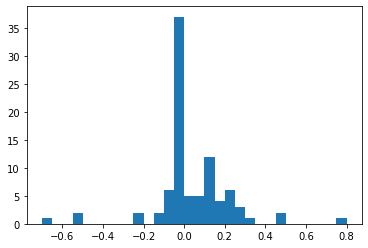

In [15]:
plt.hist(caps_polarity_scores, bins=30)
plt.show()

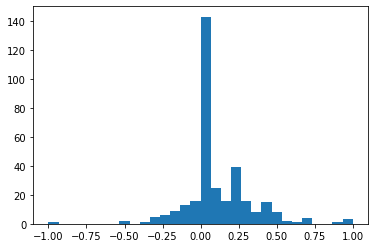

In [16]:
plt.hist(academic_polarity_scores, bins=30)
plt.show()

## Comparing CAPS vs. academic subjectivity scores

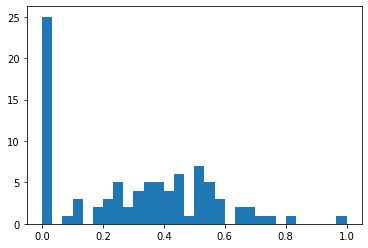

In [17]:
plt.hist(caps_subjectivity_scores, bins=30)
plt.show()

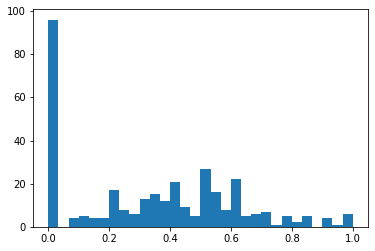

In [18]:
plt.hist(academic_subjectivity_scores, bins=30)
plt.show()

# Categorization as positive, neutral, negative

In [19]:
caps_categories = []
academic_categories = []

for score in caps_polarity_scores:
  if score > 0:
    caps_categories.append(1)
  elif score < 0:
    caps_categories.append(-1)
  else:
    caps_categories.append(0)

for score in academic_polarity_scores:
  if score > 0:
    academic_categories.append(1)
  elif score < 0:
    academic_categories.append(-1)
  else:
    academic_categories.append(0)

print(caps_categories)
print(len(caps_categories))

print(academic_categories)
print(len(academic_categories))

[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, -1, 0, -1, 0, 1, 0, -1, 0, 0, 0, 1, -1, 1, -1, 1, -1, 0, -1, -1, 0, 1, 1, 0, 0, 1, -1, 1, 1, 0, 0, 1, 1, 1, 0, 1, -1, 1, 0, 1, 1, 1, -1, 0, 1, -1, 1, 0, 1, -1, -1, 1, 1, 0, 0, 1, 0, 0, 0, 1]
89
[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, -1, 0, 0, 1, 0, 0, -1, 0, 1, -1, 0, 1, -1, 1, 1, 0, 0, 0, 1, 0, -1, 0, -1, 1, 0, 1, 0, 0, 0, -1, 0, -1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, 1, -1, 0, 1, -1, 1, 1, 1, 1, 0, -1, -1, 1, 1, -1, 1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 1, 1, 1, 1, -1, 1, 0, 1, 1, 0, 0, 1, 0, 1, -1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, -1, 0, 0, 0, -1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, -1, 0, 1, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, -1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, -1, 1, -1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, -1, -1, 0, -1, -1, 1, -1, 0, 0, 

## Conversion to Java arrays

caps java array

In [20]:
{ 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, -1, 0, -1, 0, 1, 0, -1, 0, 0, 0, 1, -1, 1, -1, 1, -1, 0, -1, -1, 0, 1, 1, 0, 0, 1, -1, 1, 1, 0, 0, 1, 1, 1, 0, 1, -1, 1, 0, 1, 1, 1, -1, 0, 1, -1, 1, 0, 1, -1, -1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0 }


{-1, 0, 1}

academic java array

In [21]:
{ 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, -1, 0, 0, 1, 0, 0, -1, 0, 1, -1, 0, 1, -1, 1, 1, 0, 0, 0, 1, 0, -1, 0, -1, 1, 0, 1, 0, 0, 0, -1, 0, -1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, 1, -1, 0, 1, -1, 1, 1, 1, 1, 0, -1, -1, 1, 1, -1, 1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 1, 1, 1, 1, -1, 1, 0, 1, 1, 0, 0, 1, 0, 1, -1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, -1, 0, 0, 0, -1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, -1, 0, 1, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, -1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, -1, 1, -1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, -1, -1, 0, -1, -1, 1, -1, 0, 0, 0, -1, 1, 1, 1, 0, -1, -1, 1, 0, 0, 1, 0, -1, 1, -1, 1, 0, 1, 0, 0, 1, 0, 1, -1, 0, 0, 1, 0, -1, 0, 0, -1, 1, 1, -1, 1, 0, 0, 1, -1, 0, 1, 1, 0, 0, 1, 1, 1, 1, -1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, -1, 0, 0, -1, -1, -1, 0, 1, 1, -1, 1, 1, -1, 0, 1, 0, 0, -1, 1, 1, 0, 0, 1, -1, 1, 0, 0, -1, -1, 1, 1, 1, 1, 1, -1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 }

{-1, 0, 1}

# Affiliation Network Graph (visualization)

In [22]:
# 91 in caps posts, 348 in academic posts --> 439 total users 
# number of unique users: 325

In [23]:
user_categories = [1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2]


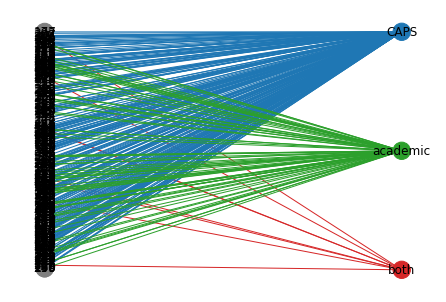

In [24]:
import networkx as nx
import random 
G = nx.Graph()
color_map = []

G.add_node("both", size=100, type_='post_category') # both
G.add_node("CAPS", size=100, type_='post_category') # CAPS
G.add_node("academic", size=100, type_='post_category') # academic
color_map.append('tab:red')
color_map.append('tab:blue')
color_map.append('tab:green')

for i in range(len(user_categories)):
  G.add_node(i, size=1)
  color_map.append('tab:gray')
  if user_categories[i] == 3:
    G.add_edge(i, "both", color='tab:red')
  elif user_categories[i] == 2:
    G.add_edge(i, "CAPS", color='tab:blue')
  elif user_categories[i] == 1:
    G.add_edge(i, "academic", color='tab:green')

pos = {
    n: (
        0, 
        random.random()
    )
    for n in G.nodes
}
pos["both"] = (1, 0)
pos["academic"] = (1, 0.5)
pos["CAPS"] = (1, 1)
# pos = nx.spring_layout(G)
colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, 
        pos=pos,
        node_color=color_map, 
        edge_color=colors,
        with_labels=[True])

plt.show()

In [26]:
caps_count = 0
academic_count = 0
both_count = 0

for i in user_categories:
  if i == 2:
    caps_count += 1
  elif i == 1:
    academic_count += 1
  elif i == 3:
    both_count += 1

print(caps_count)
print(academic_count)
print(both_count)

244
76
8
